**Текст, выделенный полужирным шрифтом**#**Выпускной проект** "Сегментация клиентской базы телекоммуникационной компании"



**Выполнила:** Абрамова Наталья Андреевна

**Содержание:**

Описание проекта:

**Аналитическая задача** —провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

In [6]:
# ставим пакет для траслитерации
!pip install transliterate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.0 MB/s eta 0:00:00


In [69]:
#импортируем библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from transliterate import translit
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr,shapiro, ks_2samp, mannwhitneyu


In [8]:
#загрузка данных
df = pd.read_csv("/content/dataset_telecom.csv")
df.head(10)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53
5,26,324.56,3.3,45.0,75.0,3,1,1,8,15,2016-11-13 15:53:16
6,50,410.04,4.1,61.0,71.0,0,0,2,23,4,2017-07-19 16:02:01
7,66,14.52,1.1,10.0,1.0,0,0,0,3,1,2015-04-27 15:25:42
8,36,209.12,2.5,34.0,70.0,3,2,0,7,63,2017-03-03 12:27:05
9,40,162.40,1.6,79.0,32.0,4,0,0,18,27,2019-05-22 10:22:37


#Изучение общей информации

In [ ]:
#просмотр информации о типах и пропущенных значениях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

|Признак|Комментарий|
|--:|:--|
|`Звонков ночью за месяц`|корректировка типа|
|`Звонки в другие города`|корректировка типа|
|`Доля звонков на стационарные телефоны`|корректировка типа|
|`Количество SMS за месяц`|корректировка типа|
|`Дата подключения тарифа`|корректировка типа|
|`Среднемесячный расход`|есть пропуски|
|`Звонков днем за месяц`|есть пропуски|
|`Звонков вечером за месяц`|есть пропуски|


In [9]:
#описательная статистика
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
df.describe(percentiles=per).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
Возраст,4492.0,41.894924,13.077254,19.00,19.0000,20.0,31.00,43.00,52.00,58.00,63.0000,69.0000,70.00
Среднемесячный расход,4468.0,505.533577,646.354693,3.18,7.7901,16.8,152.49,315.51,599.84,1068.25,1610.3045,3544.9029,5142.76
Средняя продолжительность разговоров,4475.0,4.230827,3.005210,0.10,0.4000,1.1,2.10,3.30,5.90,8.30,9.7000,14.4520,20.00
Звонков днем за месяц,4472.0,63.899374,62.877394,1.00,2.0000,5.0,37.00,53.00,68.00,104.00,133.0000,391.1600,500.00
Звонков вечером за месяц,4489.0,70.363778,41.219909,1.00,2.0000,4.0,42.00,71.00,98.00,128.00,142.0000,156.0000,160.00
Звонки в другие страны,4492.0,0.394034,1.171980,0.00,0.0000,0.0,0.00,0.00,0.00,1.00,2.0000,6.0000,12.00


|Признак|Описание|
|--:|:--|
|`Звонки в другие страны`|возможно стоит анализировать отдельно, так как очень малый процент клиентов пользуется услугой|

#Первичная обработка данных

In [10]:
#Корректировка заголовков
df.columns
#сохраним старые названия для подписи рисунков
old_columns = df.columns
old_columns


Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'],
      dtype='object')

In [11]:
#избавимся от разного регистра в названиях столбцов
df.columns = df.columns.str.lower()
df.columns

#избавляемся от проелов и переходим от кирилицы
df.columns = [translit("_".join(col.split()), 'ru', reversed = True) for col in df.columns]
df.columns = [col.replace("'","") for col in df.columns]
df.columns

#создание словаря для рисунков
dct_name_paint = dict(zip(df.columns, old_columns))
dct_name_paint

{'vozrast': 'Возраст',
 'srednemesjachnyj_rashod': 'Среднемесячный расход',
 'srednjaja_prodolzhitelnost_razgovorov': 'Средняя продолжительность разговоров',
 'zvonkov_dnem_za_mesjats': 'Звонков днем за месяц',
 'zvonkov_vecherom_za_mesjats': 'Звонков вечером за месяц',
 'zvonkov_nochju_za_mesjats': 'Звонков ночью за месяц',
 'zvonki_v_drugie_goroda': 'Звонки в другие города',
 'zvonki_v_drugie_strany': 'Звонки в другие страны',
 'dolja_zvonkov_na_statsionarnye_telefony': 'Доля звонков на стационарные телефоны',
 'kolichestvo_sms_za_mesjats': 'Количество SMS за месяц',
 'data_podkljuchenija_tarifa': 'Дата подключения тарифа'}

In [12]:

# #Корректировка типов данных
df = df.astype({"zvonkov_nochju_za_mesjats": "float64",
           "zvonki_v_drugie_goroda": "float64",
           "dolja_zvonkov_na_statsionarnye_telefony": "float64",
           "kolichestvo_sms_za_mesjats": "float64",
           "data_podkljuchenija_tarifa": "datetime64[ns]"}, errors="ignore")

df.info()

#Поиск аномалий в содержимом столбцов, так как при попытке перевода типа данных возникла ошибка
lst_columns = ['vozrast', 'srednemesjachnyj_rashod',
       'srednjaja_prodolzhitelnost_razgovorov', 'zvonkov_dnem_za_mesjats',
       'zvonkov_vecherom_za_mesjats', 'zvonkov_nochju_za_mesjats',
       'zvonki_v_drugie_goroda', 'zvonki_v_drugie_strany',
       'dolja_zvonkov_na_statsionarnye_telefony', 'kolichestvo_sms_za_mesjats',
       'data_podkljuchenija_tarifa']
for col in lst_columns:
  print(f'--признак {col}---')
  print(df[col].unique())
  print('-----')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   vozrast                                  4492 non-null   int64         
 1   srednemesjachnyj_rashod                  4468 non-null   float64       
 2   srednjaja_prodolzhitelnost_razgovorov    4475 non-null   float64       
 3   zvonkov_dnem_za_mesjats                  4472 non-null   float64       
 4   zvonkov_vecherom_za_mesjats              4489 non-null   float64       
 5   zvonkov_nochju_za_mesjats                4492 non-null   object        
 6   zvonki_v_drugie_goroda                   4492 non-null   object        
 7   zvonki_v_drugie_strany                   4492 non-null   int64         
 8   dolja_zvonkov_na_statsionarnye_telefony  4492 non-null   object        
 9   kolichestvo_sms_za_mesjats               

Можем видеть, что в столбцах, тип данных которых не удалось изменить есть лишние кавычки

In [13]:
#Убираем лишние кавычки
lst_transl = ['kolichestvo_sms_za_mesjats', 'zvonkov_nochju_za_mesjats', 'zvonki_v_drugie_goroda', 'dolja_zvonkov_na_statsionarnye_telefony']
for col in lst_transl:
  df[col] = df[col].astype(str)
  df[col] = df[col].str.strip("'")




In [14]:
# #Корректировка типов данных
df = df.astype({"zvonkov_nochju_za_mesjats": "float64",
           "zvonki_v_drugie_goroda": "float64",
           "dolja_zvonkov_na_statsionarnye_telefony": "float64",
           "kolichestvo_sms_za_mesjats": "float64",
           "data_podkljuchenija_tarifa": "datetime64[ns]"},errors="ignore")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   vozrast                                  4492 non-null   int64         
 1   srednemesjachnyj_rashod                  4468 non-null   float64       
 2   srednjaja_prodolzhitelnost_razgovorov    4475 non-null   float64       
 3   zvonkov_dnem_za_mesjats                  4472 non-null   float64       
 4   zvonkov_vecherom_za_mesjats              4489 non-null   float64       
 5   zvonkov_nochju_za_mesjats                4492 non-null   float64       
 6   zvonki_v_drugie_goroda                   4492 non-null   float64       
 7   zvonki_v_drugie_strany                   4492 non-null   int64         
 8   dolja_zvonkov_na_statsionarnye_telefony  4492 non-null   float64       
 9   kolichestvo_sms_za_mesjats               

In [15]:
#Поиск аномальных значений
#Выделим непрерывные числовые признаки

cont_var = ['vozrast', 'srednemesjachnyj_rashod',
       'srednjaja_prodolzhitelnost_razgovorov', 'zvonkov_dnem_za_mesjats',
       'zvonkov_vecherom_za_mesjats', 'zvonkov_nochju_za_mesjats',
       'zvonki_v_drugie_goroda', 'zvonki_v_drugie_strany',
       'dolja_zvonkov_na_statsionarnye_telefony', 'kolichestvo_sms_za_mesjats']

In [16]:
#Поиск дублирующих значений

print(f"""В данных {df.duplicated().sum()} дублей.""")

В данных 0 дублей.


In [17]:
def calc_boxplot(df_col : pd.Series) -> tuple:

      Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
      IQR = Q3 - Q1
      loval = Q1 - 1.5 * IQR
      hival = Q3 + 1.5 * IQR
      wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
      wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
      actual_hival = np.max(wiskhi)
      actual_loval = np.min(wisklo)
      return actual_loval, actual_hival #(нижний ус, верхний ус)


<ipython-input-18-120bf9635b8f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(cont_var), 2, 2*index_fig + 1)
<ipython-input-18-120bf9635b8f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(cont_var), 2, 2*index_fig + 1)
<ipython-input-18-120bf9635b8f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(cont_var), 2, 2*index_fig + 1)
<ipython-input-18-120bf9635b8f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(cont_va

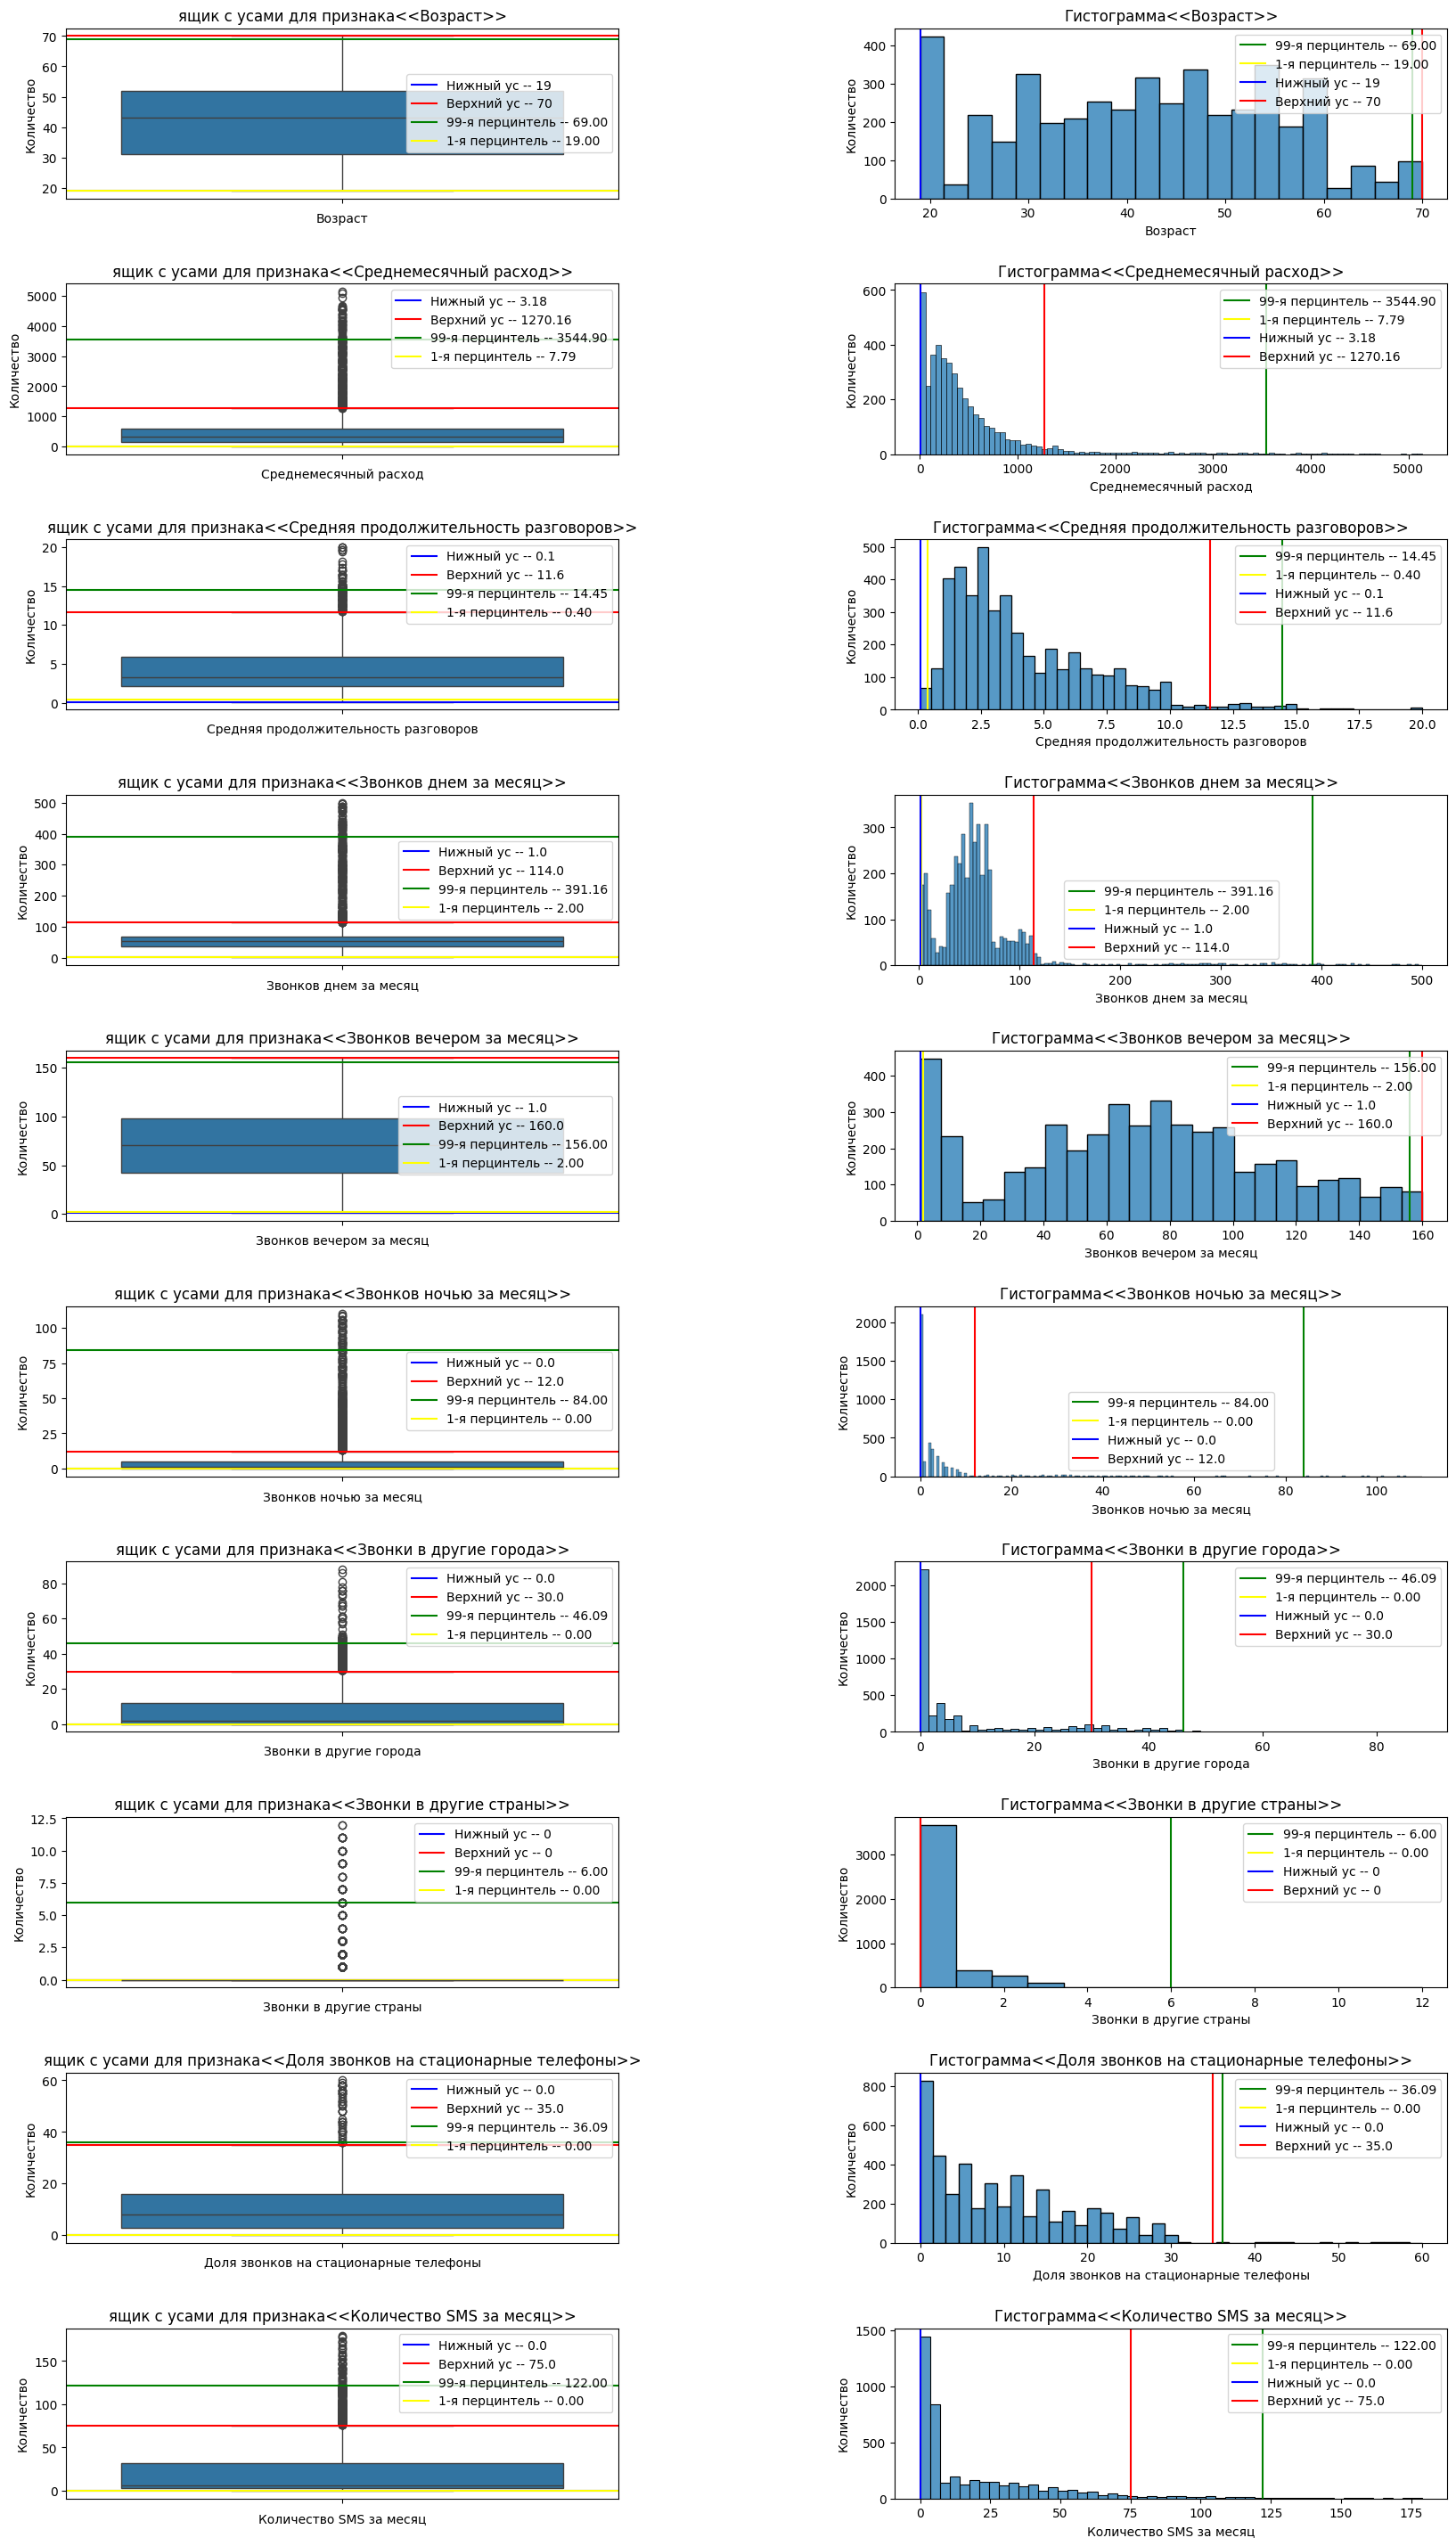

In [18]:
plt.subplots(len(cont_var), figsize=(20, 36))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.5)
for index_fig, col in enumerate(cont_var, start=0):
    plt.subplot(len(cont_var), 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                     y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    ax.set_xlabel(dct_name_paint[col])
    ax.set_ylabel("Количество")
    ax.set_title(f"""ящик с усами для признака<<{dct_name_paint[col]}>>""")
    plt.legend();
    plt.subplot(len(cont_var), 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    ax.set_xlabel(dct_name_paint[col])
    ax.set_ylabel("Количество")
    ax.set_title(f"""Гистограмма<<{dct_name_paint[col]}>>""")
    plt.legend();

In [19]:
#фильтрация данных по верхнему и нижнему усу выбранных признаков
filt = (
      (df.srednemesjachnyj_rashod.between(calc_boxplot(df.srednemesjachnyj_rashod)[0],
                                                      calc_boxplot(df.srednemesjachnyj_rashod)[1]))
      & (df.srednjaja_prodolzhitelnost_razgovorov.between(calc_boxplot(df.srednjaja_prodolzhitelnost_razgovorov)[0],
                                                      calc_boxplot(df.srednjaja_prodolzhitelnost_razgovorov)[1]))
      & (df.zvonkov_dnem_za_mesjats.between(calc_boxplot(df.zvonkov_dnem_za_mesjats)[0],
                                                      calc_boxplot(df.zvonkov_dnem_za_mesjats)[1]))
      # & (df.zvonkov_vecherom_za_mesjats.between(calc_boxplot(df.zvonkov_vecherom_za_mesjats)[0],
      #                                                 calc_boxplot(df.zvonkov_vecherom_za_mesjats)[1]))
      & (df.zvonkov_nochju_za_mesjats.between(calc_boxplot(df.zvonkov_nochju_za_mesjats)[0],
                                                      calc_boxplot(df.zvonkov_nochju_za_mesjats)[1]))
      & (df.zvonki_v_drugie_goroda.between(calc_boxplot(df.zvonki_v_drugie_goroda)[0],
                                                      calc_boxplot(df.zvonki_v_drugie_goroda)[1]))
      & (df.zvonki_v_drugie_strany.between(calc_boxplot(df.zvonki_v_drugie_strany)[0],
                                                      calc_boxplot(df.zvonki_v_drugie_strany)[1]))
      & (df.dolja_zvonkov_na_statsionarnye_telefony.between(calc_boxplot(df.dolja_zvonkov_na_statsionarnye_telefony)[0],
                                                      calc_boxplot(df.dolja_zvonkov_na_statsionarnye_telefony)[1]))
      & (df.kolichestvo_sms_za_mesjats.between(calc_boxplot(df.kolichestvo_sms_za_mesjats)[0],
                                                      calc_boxplot(df.kolichestvo_sms_za_mesjats)[1])))


In [20]:
print(f"Процент потерь {(1-df[filt].shape[0]/df.shape[0]):.2%}")

#srednemesjachnyj_rashod -- значительный прирост
#srednjaja_prodolzhitelnost_razgovorov --незначительный прирост
#zvonkov_dnem_za_mesjats--незначительный прирост
# df.zvonkov_nochju_za_mesjats -- значительный прирост
# zvonki_v_drugie_goroda -- значительный прирост
# zvonki_v_drugie_strany -- очень значительный прирост
# dolja_zvonkov_na_statsionarnye_telefony--незначительный прирост
# kolichestvo_sms_za_mesjats--незначительный прирост



Процент потерь 36.71%


Можем сделать вывод, что процент "аномальных данных" большой, поэтому поведение аномальных клиентов следует проанализировать отдельно.


In [21]:
#восстанавливаем пропущенные значения
df = df.fillna(df.mean())
df.head(10)

,vozrast,srednemesjachnyj_rashod,srednjaja_prodolzhitelnost_razgovorov,zvonkov_dnem_za_mesjats,zvonkov_vecherom_za_mesjats,zvonkov_nochju_za_mesjats,zvonki_v_drugie_goroda,zvonki_v_drugie_strany,dolja_zvonkov_na_statsionarnye_telefony,kolichestvo_sms_za_mesjats,data_podkljuchenija_tarifa
0,24,505.533577,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35
1,51,287.510000,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54
2,41,113.700000,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15
3,35,410.230000,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20
4,26,537.600000,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53
5,26,324.560000,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16
6,50,410.040000,4.1,61.0,71.0,0.0,0.0,2,23.0,4.0,2017-07-19 16:02:01
7,66,14.520000,1.1,10.0,1.0,0.0,0.0,0,3.0,1.0,2015-04-27 15:25:42
8,36,209.120000,2.5,34.0,70.0,3.0,2.0,0,7.0,63.0,2017-03-03 12:27:05
9,40,162.400000,1.6,79.0,32.0,4.0,0.0,0,18.0,27.0,2019-05-22 10:22:37


#Добавление новых переменных

In [22]:
#по значениям признака "Возраст" введем новую переменную Возрастная категория, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток"
conditions = [
    (df['vozrast'].between(19, 24)),
    (df['vozrast'].between(25, 33)),
    (df['vozrast'].between(34, 56)),
    (df['vozrast'].between(57, 70))
]

choices = ['студент', 'аспирант', 'бизнесмен', 'знаток']
df['vozrastnaya_kategorya'] = np.select(conditions, choices, default='другое')

df



,vozrast,srednemesjachnyj_rashod,srednjaja_prodolzhitelnost_razgovorov,zvonkov_dnem_za_mesjats,zvonkov_vecherom_za_mesjats,zvonkov_nochju_za_mesjats,zvonki_v_drugie_goroda,zvonki_v_drugie_strany,dolja_zvonkov_na_statsionarnye_telefony,kolichestvo_sms_za_mesjats,data_podkljuchenija_tarifa,vozrastnaya_kategorya
0,24,505.533577,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35,студент
1,51,287.510000,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,бизнесмен
2,41,113.700000,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен
3,35,410.230000,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен
4,26,537.600000,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,аспирант
...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.200000,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23,бизнесмен
4488,40,500.680000,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43,бизнесмен
4489,60,470.420000,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38,знаток
4490,38,858.990000,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26,бизнесмен


In [23]:
# по значениям признака Дата подключения тарифа создадим признаки: Год подключения, Месяц подключения, Дата подключения

df["god_podkljuchenija"] = df["data_podkljuchenija_tarifa"].dt.year
df["mesyac_podkljuchenija"] = df["data_podkljuchenija_tarifa"].dt.month
df["data_podkljuchenija"] = df["data_podkljuchenija_tarifa"].dt.date
df["week_day"] = df["data_podkljuchenija_tarifa"].dt.day_name()
df

,vozrast,srednemesjachnyj_rashod,srednjaja_prodolzhitelnost_razgovorov,zvonkov_dnem_za_mesjats,zvonkov_vecherom_za_mesjats,zvonkov_nochju_za_mesjats,zvonki_v_drugie_goroda,zvonki_v_drugie_strany,dolja_zvonkov_na_statsionarnye_telefony,kolichestvo_sms_za_mesjats,data_podkljuchenija_tarifa,vozrastnaya_kategorya,god_podkljuchenija,mesyac_podkljuchenija,data_podkljuchenija,week_day
0,24,505.533577,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35,студент,2018,6,2018-06-17,Sunday
1,51,287.510000,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,бизнесмен,2021,10,2021-10-21,Thursday
2,41,113.700000,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,3,2015-03-26,Thursday
3,35,410.230000,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,1,2016-01-04,Monday
4,26,537.600000,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,аспирант,2017,5,2017-05-03,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.200000,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23,бизнесмен,2021,4,2021-04-10,Saturday
4488,40,500.680000,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43,бизнесмен,2021,9,2021-09-22,Wednesday
4489,60,470.420000,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38,знаток,2019,4,2019-04-04,Thursday
4490,38,858.990000,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26,бизнесмен,2015,12,2015-12-30,Wednesday


#Исследовательский анализ данных

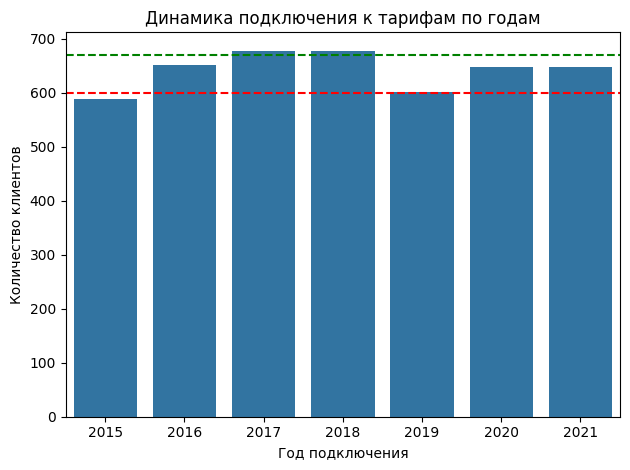

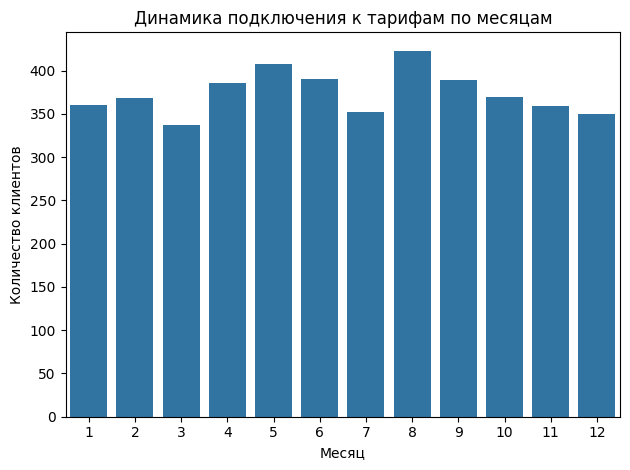

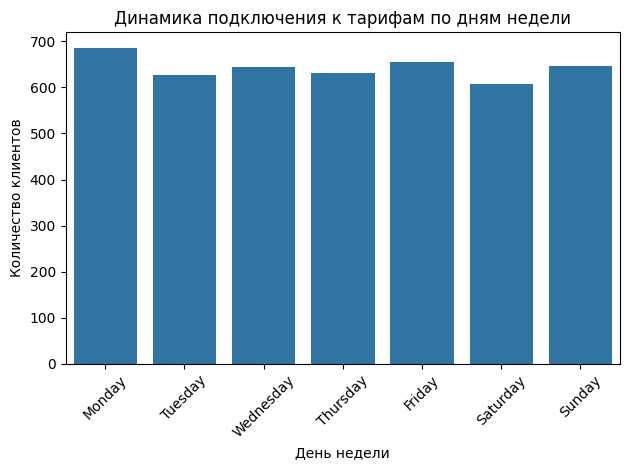

In [24]:
#Построим графики для анализа динамики подключения к тарифам
sns.countplot(x = df['god_podkljuchenija'])
plt.title('Динамика подключения к тарифам по годам')
plt.xlabel('Год подключения')
plt.ylabel('Количество клиентов')
plt.axhline(y=600, color='r', linestyle='--')
plt.axhline(y=670, color='g', linestyle='--')
plt.tight_layout()
plt.show()

sns.countplot(x = df['mesyac_podkljuchenija'])
plt.title('Динамика подключения к тарифам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

week_days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='week_day', data=df, order=week_days_order)
plt.title('Динамика подключения к тарифам по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Судя по графикам выше можно сделать выводы, что больше всего клиентов было в 2017 и 2018 годах. А меньше всего в 2015 году. Из чего мы можем предположить что в 2017 и 2018 годах было меньше конкуренции и были хорошие предложения по тарифам. Самый популярный месяц для подключения тарифа - август, самый не популярный - март. Возможно август пользуется большим спросом в зависимости от сезонности, так как сезон отпусков. Больше всего клиентов подключалось в понедельник, меньше всего в субботу.

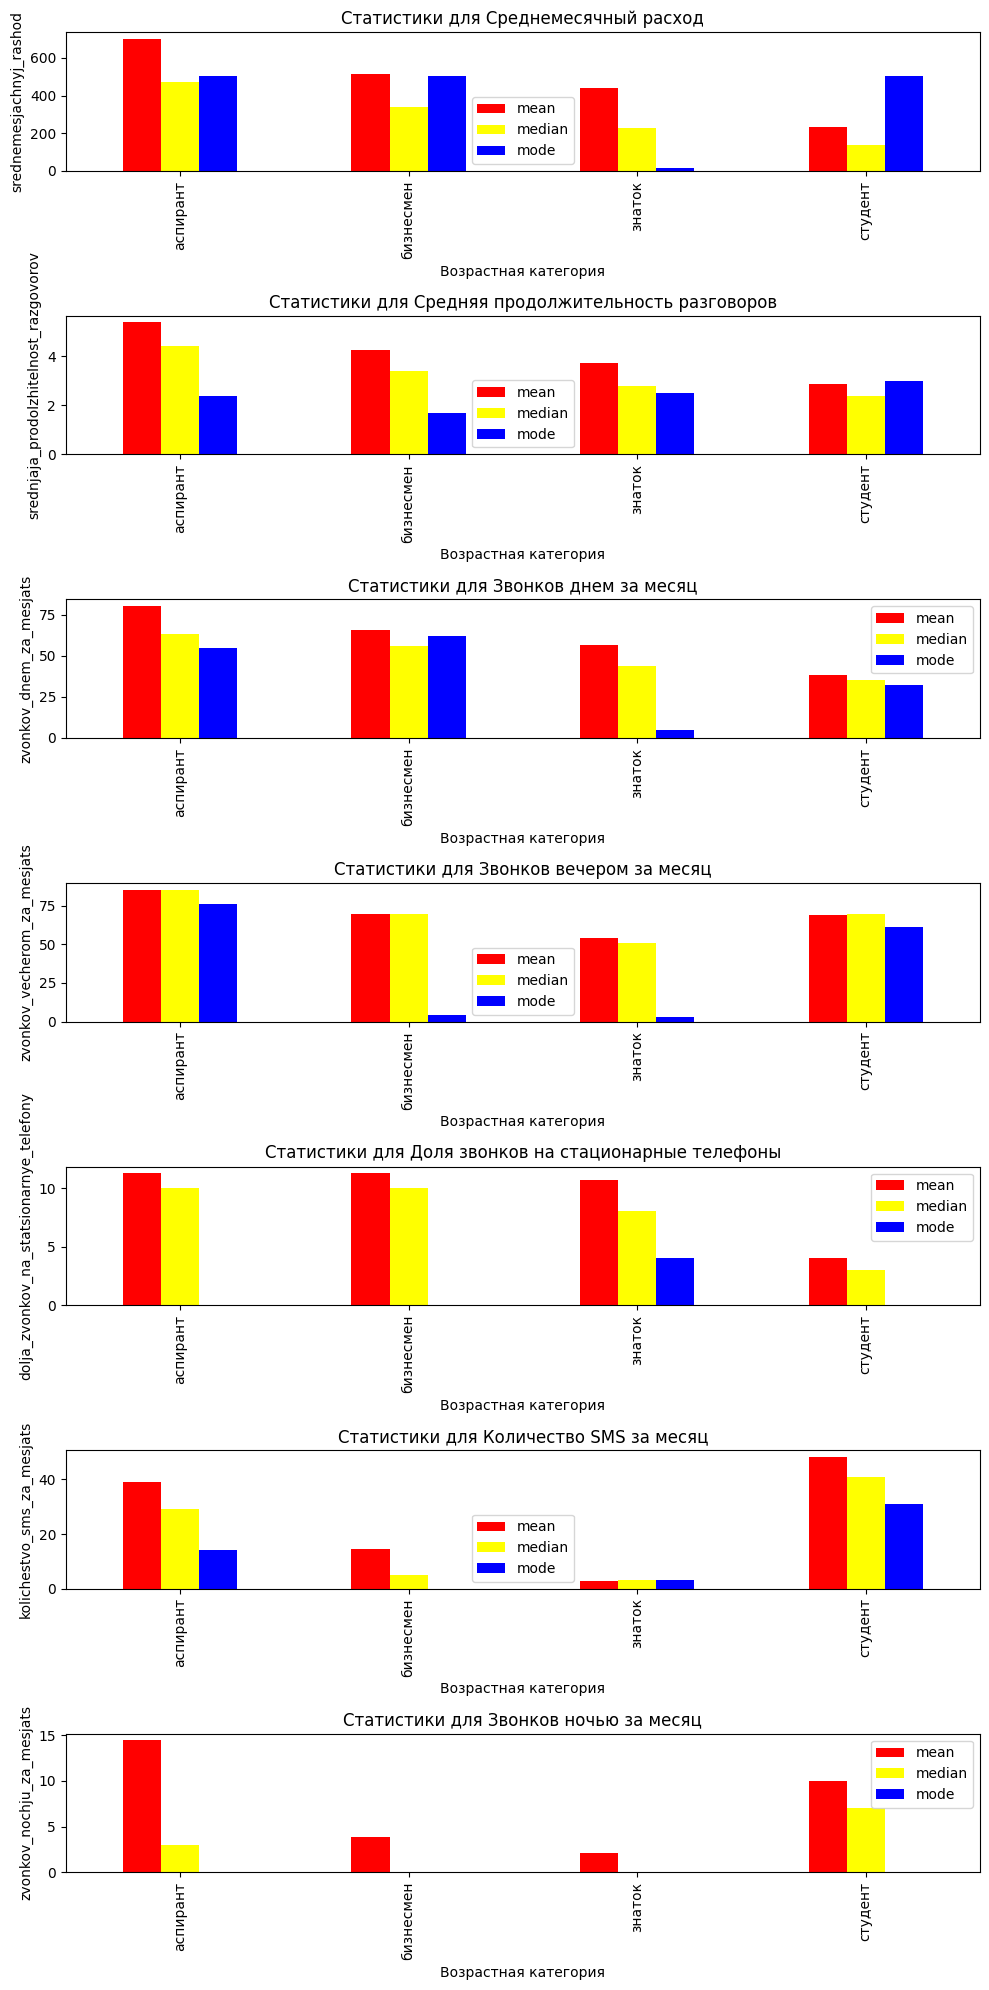

Статистики для Среднемесячный расход:
                             mean  median        mode
vozrastnaya_kategorya                                
аспирант               700.739910  470.77  505.533577
бизнесмен              513.976155  340.16  505.533577
знаток                 441.536773  226.80   16.800000
студент                233.043251  138.32  505.533577

Статистики для Средняя продолжительность разговоров:
                           mean  median  mode
vozrastnaya_kategorya                        
аспирант               5.377571     4.4   2.4
бизнесмен              4.269226     3.4   1.7
знаток                 3.725603     2.8   2.5
студент                2.849130     2.4   3.0

Статистики для Звонков днем за месяц:
                            mean  median  mode
vozrastnaya_kategorya                         
аспирант               80.306375    63.0  55.0
бизнесмен              65.616590    56.0  62.0
знаток                 56.671253    44.0   5.0
студент                38.521660  

In [25]:
#Для каждого из признаков рассчем выборочное среднее, медиану и моду
columns = [
    'srednemesjachnyj_rashod',
    'srednjaja_prodolzhitelnost_razgovorov',
    'zvonkov_dnem_za_mesjats',
    'zvonkov_vecherom_za_mesjats',
    'dolja_zvonkov_na_statsionarnye_telefony',
    'kolichestvo_sms_za_mesjats',
    'zvonkov_nochju_za_mesjats'
]
def calculate_stats(df, columns):
    stats = df.groupby('vozrastnaya_kategorya')[columns].agg(['mean', 'median'])
    stats['mode'] = df.groupby('vozrastnaya_kategorya')[columns].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    return stats

# Построение графиков
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 20))

for i, column in enumerate(columns):
    stats = calculate_stats(df, column)
    stats.plot(kind='bar', ax=axes[i], color=['red', 'yellow', 'blue'])
    axes[i].set_title(f'Статистики для {dct_name_paint[column]}')
    axes[i].set_xlabel('Возрастная категория')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

# Вывод статистик
for column in columns:
    print(f'Статистики для {dct_name_paint[column]}:')
    print(calculate_stats(df, column))
    print()






Выводы:

Среднемесячный расход:
Аспиранты имеют наибольший среднемесячный расход, за ними следуют бизнесмены, знатоки и студенты. Это может указывать на то, что аспиранты и бизнесмены чаще используют мобильные услуги.

Средняя продолжительность разговоров:
Аспиранты также имеют наибольшую среднюю продолжительность разговоров, что говорит о более длительных и частых разговорах по сравнению с другими категориями.

Звонки днем за месяц:
Аспиранты совершают больше звонков днем, чем другие категории,
что может быть связано с их работой. У бизнесменов и знатоков звонков днем чуть меньше.

Звонки вечером за месяц:
Аспиранты совершают больше звонков вечером, чем другие категории,
что может быть связано с их активностью в свободное время после работы.

Доля звонков на стационарные телефоны:
Аспиранты и бизнесмены имеют более высокую долю звонков на стационарные телефоны, что может быть связано с их профессиональной деятельностью. Также довольно много звонков на стацианарные телеыоны совершают знатоки, что может быть связано с их предпочтениями в общении.

Количество SMS за месяц:
Студенты отправляют больше SMS, чем другие категории,
что может быть связано с их потребностями в учебной и личной жизни. А также с меньшей затратой времени на звонки и возможно более дешевым тарифом с пакетом смс.

Звонки ночью за месяц:
Аспиранты совершают больше звонков ночью, чем другие категории,
что может быть связано с их ночным образом жизни. Или более дешевым тарифом для звонков в ночное время.

В целом, данные статистики позволяют предположить,
что аспиранты и бизнесмены скорее всего более активно используют мобильные услуги для профессиональных целей, а студенты демонстрируют более высокую активность в использовании SMS.
Знатоки, как мы видим, используют мобильные услуги в меньшей степени по сравнению с другими категориями.


In [26]:
# Опрелделим ТОП-2 возрастных категорий по заданному признаку
def top_2(df, feature):
    top = df.groupby('vozrastnaya_kategorya')[feature].mean().nlargest(2).index.tolist()
    return top

# Определим ТОП-2 возрастных категорий по различным признакам
top_2_расход = top_2(df, 'srednemesjachnyj_rashod')
top_2_продолжительность = top_2(df, 'srednjaja_prodolzhitelnost_razgovorov')
top_2_звонки_днем = top_2(df, 'zvonkov_dnem_za_mesjats')
top_2_звонки_вечером = top_2(df, 'zvonkov_vecherom_za_mesjats')
top_2_звонки_ночью = top_2(df, 'zvonkov_nochju_za_mesjats')
top_2_звонки_стационарный_телефон = top_2(df, 'dolja_zvonkov_na_statsionarnye_telefony')
top_2_смс = top_2(df, 'kolichestvo_sms_za_mesjats')


print("ТОП-2 возрастных категорий по среднемесячному расходу:", top_2_расход)
print("ТОП-2 возрастных категорий по средней продолжительности разговоров:", top_2_продолжительность)
print("ТОП-2 возрастных категорий по количеству звонков днем:", top_2_звонки_днем)
print("ТОП-2 возрастных категорий по количеству звонков вечером:", top_2_звонки_вечером)
print("ТОП-2 возрастных категорий по количеству звонков ночью:", top_2_звонки_ночью)
print("ТОП-2 возрастных категорий по количеству звонков на стационарный телефон:", top_2_звонки_стационарный_телефон)
print("ТОП-2 возрастных категорий по количеству смс:", top_2_смс)

# Проверим совпадения результатов
совпадают_расход_продолжительность = set(top_2_расход) == set(top_2_продолжительность)
совпадают_расход_звонки_днем = set(top_2_расход) == set(top_2_звонки_днем)
совпадают_расход_звонки_вечером = set(top_2_расход) == set(top_2_звонки_вечером)
совпадают_расход_звонки_ночью = set(top_2_расход) == set(top_2_звонки_ночью)
совпадают_расход_стационарный_телефон = set(top_2_расход) == set(top_2_звонки_стационарный_телефон)
совпадают_расход_смс = set(top_2_расход) == set(top_2_смс)


print("Совпадают ли результаты по расходу и продолжительности разговоров:", совпадают_расход_продолжительность)
print("Совпадают ли результаты по расходу и количеству звонков днем:", совпадают_расход_звонки_днем)
print("Совпадают ли результаты по расходу и количеству звонков вечером:", совпадают_расход_звонки_вечером)
print("Совпадают ли результаты по расходу и количеству звонков ночью:", совпадают_расход_звонки_ночью)
print("Совпадают ли результаты по расходу и количеству звонков на стацианарный телефон:", совпадают_расход_стационарный_телефон)
print("Совпадают ли результаты по расходу и количеству смс:", совпадают_расход_смс)

ТОП-2 возрастных категорий по среднемесячному расходу: ['аспирант', 'бизнесмен']
ТОП-2 возрастных категорий по средней продолжительности разговоров: ['аспирант', 'бизнесмен']
ТОП-2 возрастных категорий по количеству звонков днем: ['аспирант', 'бизнесмен']
ТОП-2 возрастных категорий по количеству звонков вечером: ['аспирант', 'бизнесмен']
ТОП-2 возрастных категорий по количеству звонков ночью: ['аспирант', 'студент']
ТОП-2 возрастных категорий по количеству звонков на стационарный телефон: ['аспирант', 'бизнесмен']
ТОП-2 возрастных категорий по количеству смс: ['студент', 'аспирант']
Совпадают ли результаты по расходу и продолжительности разговоров: True
Совпадают ли результаты по расходу и количеству звонков днем: True
Совпадают ли результаты по расходу и количеству звонков вечером: True
Совпадают ли результаты по расходу и количеству звонков ночью: False
Совпадают ли результаты по расходу и количеству звонков на стацианарный телефон: True
Совпадают ли результаты по расходу и количеств

In [28]:
#найдем сумму средних значений по количеству звонков в месяц днем, вечером и ночью:
mean_all = df.groupby('vozrastnaya_kategorya')[['zvonkov_dnem_za_mesjats', 'zvonkov_vecherom_za_mesjats', 'zvonkov_nochju_za_mesjats']].mean().sum(axis=1)
mean_all

vozrastnaya_kategorya
аспирант     180.255833
бизнесмен    139.408667
знаток       112.997068
студент      117.318565
dtype: float64

Больше всего в среднем в месяц тратят на оплату услуг связи тратят аспиранты 700.7 и бизнесмены 513.98;
больше всего тратят времени на общение в месяц днем, вечером и ночью аспиранты 5.4 и бизнесмены 4.3;
больше всего по количеству звонков в месяц днем, вечером и ночью:
аспиранты в среднем совершают 181 звонок, бизнесмены 139 звонков.

Практически по всем признакам в ТОП-2 входят аспиранты и бизнесмены, по оплате услуг связи и времени на общение, результаты совпадают: аспиранты и бизнесмены являются лидерами.
Но, в части количества звонков ночью, студенты также оказываются в ТОП-2, что указывает на их высокую активность в использовании услуг связи, особенно вечером и ночью.
Таким образом, аспиранты и бизнесмены являются наиболее активными пользователями услуг связи с точки зрения расходов и времени на общение, в то время как студенты также демонстрируют высокую активность, особенно в вечернее и ночное время и входят в ТОП-2 клиентов по использованию СМС и по  колличеству звонков ночью.






#Построим диаграммы рассеивания для исследования зависимости между признаками

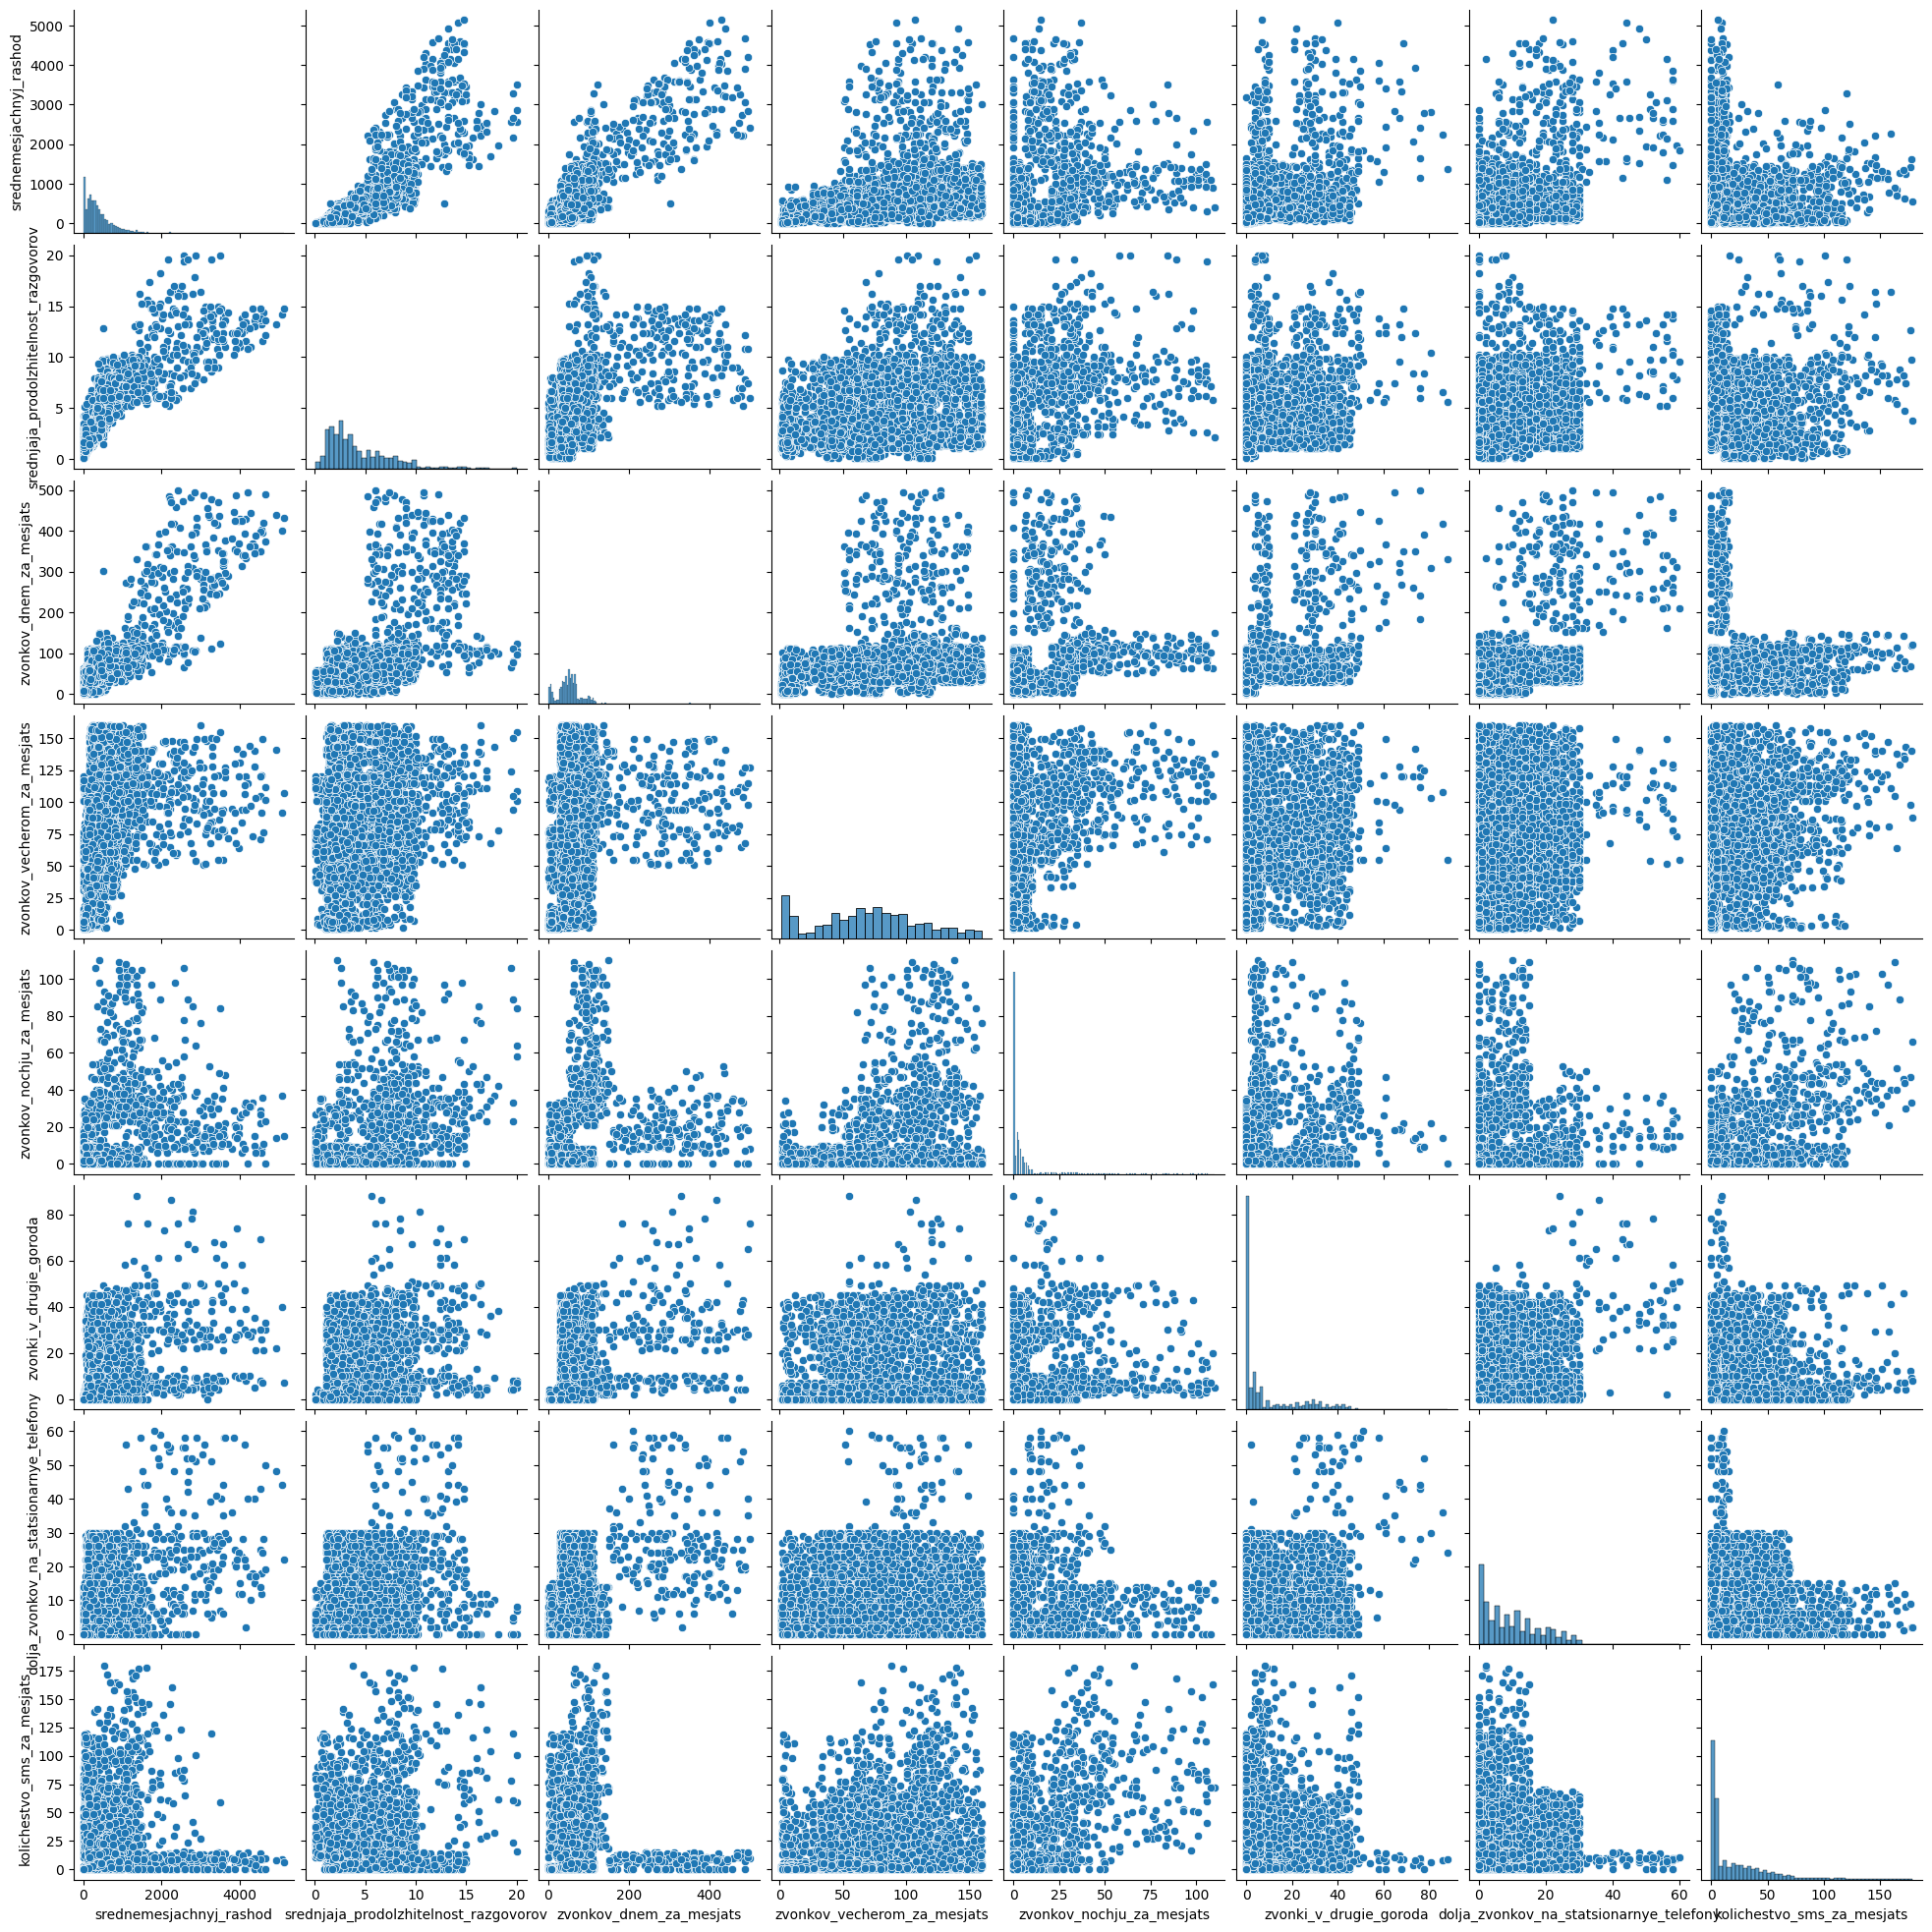

In [29]:

lst_columns = ['srednemesjachnyj_rashod','srednjaja_prodolzhitelnost_razgovorov','zvonkov_dnem_za_mesjats',
       'zvonkov_vecherom_za_mesjats', 'zvonkov_nochju_za_mesjats', 'zvonki_v_drugie_goroda', 'dolja_zvonkov_na_statsionarnye_telefony', 'kolichestvo_sms_za_mesjats']
sns.pairplot(df[lst_columns])



 Среднемесячный расход и Средняя продолжительность разговоров: Как видно из диаграммы рассеивания между этими двумя признаками наблюдается линейная зависимость, что говорит о том, что клиенты с более высоким среднемесячным расходом также тратят больше времени на общение или клиенты, которые тратят больше времени на общение имеют больший расход.  Другими словами, изменение одного признака сопровождается пропорциональным изменением другого признака.
 Точки располагаются близко к прямой линии, что говорит о сильной линейной корреляции между признаками.

Среднемесячный расход и Звонки днем за месяц:
Аналогично можно наблюдать сильную корреляцию между признаками, положительная линейная зависимость может указывать на то, что между двумя признаками определенно существует связь, и она имеет линейный характер.



In [138]:
#найдем коэффициент корреляции
df[lst_columns].corr()

,vozrast,srednemesjachnyj_rashod,srednjaja_prodolzhitelnost_razgovorov,zvonkov_dnem_za_mesjats,zvonkov_vecherom_za_mesjats,zvonkov_nochju_za_mesjats,zvonki_v_drugie_goroda,zvonki_v_drugie_strany,dolja_zvonkov_na_statsionarnye_telefony,kolichestvo_sms_za_mesjats,data_podkljuchenija_tarifa
vozrast,1.000000,-0.015445,-0.045825,-0.011949,-0.192392,-0.267692,0.029016,0.024974,0.120398,-0.592306,-0.003979
srednemesjachnyj_rashod,-0.015445,1.000000,0.827636,0.841134,0.420947,0.392357,0.334364,0.380745,0.357070,0.090348,-0.017671
srednjaja_prodolzhitelnost_razgovorov,-0.045825,0.827636,1.000000,0.515259,0.320728,0.396844,0.260560,0.230322,0.239496,0.183308,-0.031634
zvonkov_dnem_za_mesjats,-0.011949,0.841134,0.515259,1.000000,0.313464,0.315216,0.369289,0.441762,0.417943,0.027916,-0.010483
zvonkov_vecherom_za_mesjats,-0.192392,0.420947,0.320728,0.313464,1.000000,0.285876,0.198971,0.117299,0.200072,0.234756,-0.038591
zvonkov_nochju_za_mesjats,-0.267692,0.392357,0.396844,0.315216,0.285876,1.000000,0.143087,0.125936,-0.015102,0.510603,-0.006129
zvonki_v_drugie_goroda,0.029016,0.334364,0.260560,0.369289,0.198971,0.143087,1.000000,0.198812,0.257176,0.017626,-0.018216
zvonki_v_drugie_strany,0.024974,0.380745,0.230322,0.441762,0.117299,0.125936,0.198812,1.000000,0.237378,-0.033195,0.007003
dolja_zvonkov_na_statsionarnye_telefony,0.120398,0.357070,0.239496,0.417943,0.200072,-0.015102,0.257176,0.237378,1.000000,-0.122786,-0.009621
kolichestvo_sms_za_mesjats,-0.592306,0.090348,0.183308,0.027916,0.234756,0.510603,0.017626,-0.033195,-0.122786,1.000000,-0.021679


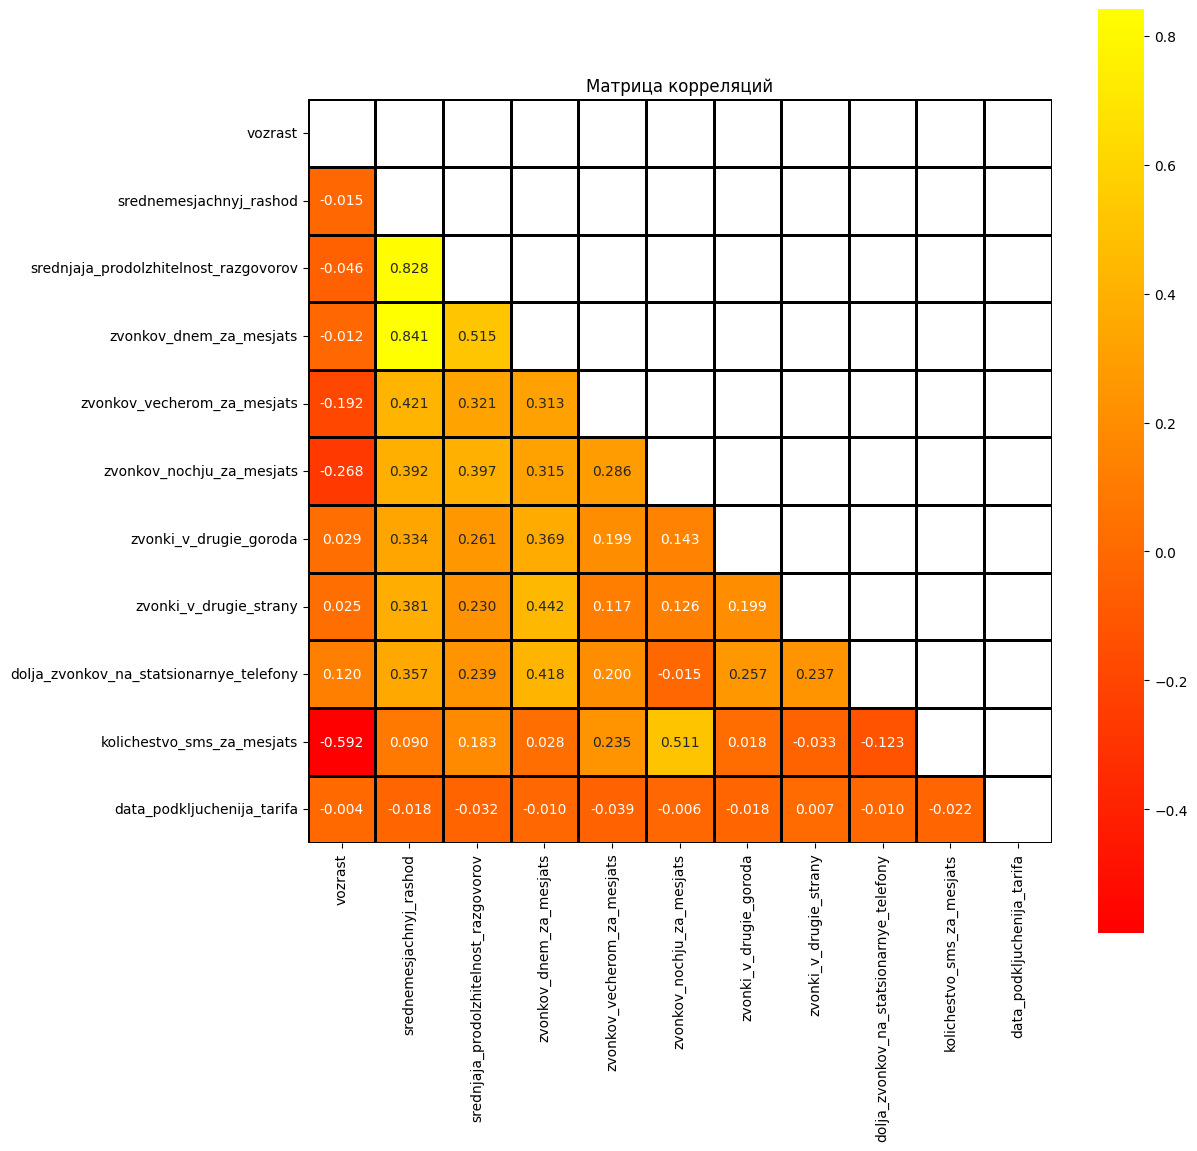

In [139]:
#построим матрицу корреляций

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df[lst_columns].corr(),
                 annot=True,
                 square=True,
                 cmap='autumn',
                 fmt='.3f',
                 linewidths=1,
                 linecolor='black',
                 mask=np.triu(df[lst_columns].corr()))
plt.title('Матрица корреляций')
plt.show()

Наблюдаем сильную связь между среднемесячным расходом на звонки и колличеством дневных звонков за месяц, также с вечерними и ночными звонками. Исходя из этого графика мы можем сделать предположение, что оплата за звонки варьируется от времени суток

#Проверка гипотез

На основе проведенного EDA для признака `srednemesjachnyj_rashod` можно сформировать следующие нулевую ($H_0$) и альтернативную ($H_1$) гипотезы:

 1.Колличество звонков днем больше колличества звонков вечером
2.Колличество звонков днем больше колличества звонков(вечером + ночью).

Нулевые гипотезы ($H_0$) 1.Колличество звонков днем не отличается от колличества звонков вечером

Разница между колличеством звонков днем и (вечером + ночью) статистически не значима.





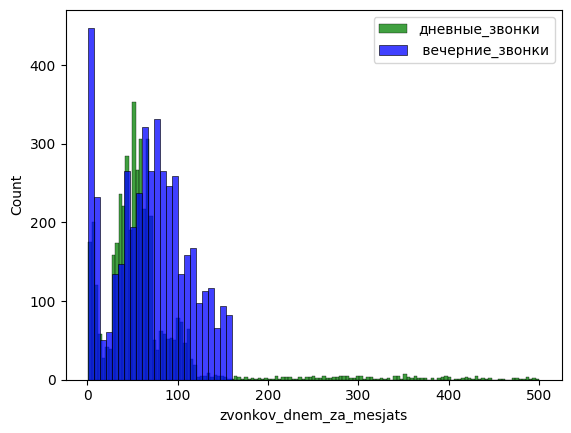

In [61]:
sns.histplot(data=df,
            x = df['zvonkov_dnem_za_mesjats'],
            color='green',
            label=f"дневные_звонки")
sns.histplot(data=df,
            x = df['zvonkov_vecherom_za_mesjats'],
            color='blue',
            label=f" вечерние_звонки")
plt.legend()

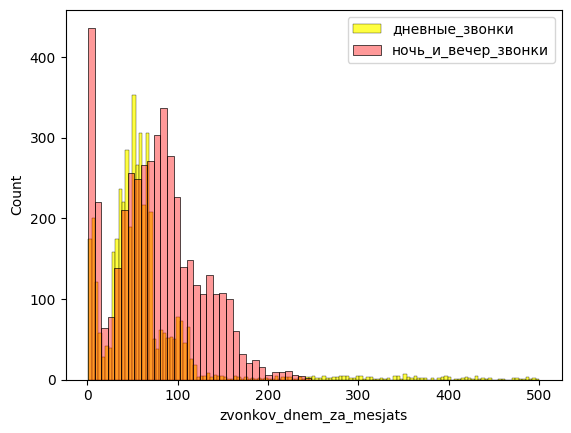

In [65]:
df["zvonki_vecher_noch"] = df["zvonkov_vecherom_za_mesjats"]+df["zvonkov_nochju_za_mesjats"]
df
sns.histplot(data=df,
            x = df['zvonkov_dnem_za_mesjats'],
            color='yellow',
            label=f"дневные_звонки")

sns.histplot(data=df,
            x = df['zvonki_vecher_noch'],
            color='red',
            label=f"ночь_и_вечер_звонки",
            alpha = 0.4)
plt.legend()

In [70]:
#Критерий Шапиро
shapiro(df["zvonkov_dnem_za_mesjats"])


ShapiroResult(statistic=0.610026120223129, pvalue=2.0665541577190468e-72)

Это означает, что вероятность получения таких или более экстремальных результатов, если нулевая гипотеза верна, крайне мала.

In [71]:
shapiro(df["zvonkov_vecherom_za_mesjats"])

ShapiroResult(statistic=0.9722624227003187, pvalue=1.1468775816733405e-28)

Нулевая гипотеза, распределение случайнх исследуемых величин не отличается от нормального
pvalue= 1.147120708287224e-28 означает очень низкую вероятность того, что наблюдаемые данные могли возникнуть случайно при верности нулевой гипотезы.

In [73]:
shapiro(df["zvonki_vecher_noch"])

ShapiroResult(statistic=0.9719872024547761, pvalue=8.600295682489818e-29)

pvalue=8.600295682489818e-29 означает очень низкую вероятность того, что наблюдаемые данные могли возникнуть случайно при верности нулевой гипотезы.

In [75]:
#критерий Колмагорова-Смирнова
ks_2samp(df["zvonkov_dnem_za_mesjats"], df["zvonkov_vecherom_za_mesjats"])


KstestResult(statistic=0.2894033837934105, pvalue=3.689889104525021e-166, statistic_location=70.0, statistic_sign=1)

Критерий Колмагорова-Смирнова равный pvalue=3.689889104525021e-166 означает законы распределения не совпадают

In [76]:
ks_2samp(df["zvonkov_dnem_za_mesjats"], df["zvonki_vecher_noch"])

KstestResult(statistic=0.3261353517364203, pvalue=9.552743876289796e-212, statistic_location=71.0, statistic_sign=1)

Критерий Колмагорова-Смирнова равный pvalue=9.552743876289796e-212 означает законы распределения не совпадают

Исходя из средних значений мы можем сделать вывод, что: 1 гипотеза - не нашла подтвердение и колличество звонктов вечером ,больше, чем колличевто звонков днем; 2 гипотеза: Колличество звонков вечером и ночью больше, чем днем

Вывод: В данном проекте мы сегментировали клиентов на группы и провели анализ использования связи.
Исходя из EDA мы можем сделать вывод, что ТОП-2 клиентов это аспиранты и бизнесмены по большинству анализируемых признаков.
С помощью гипотез, выявили, что количество звонков вечером больше количества звонков днем.